In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [2]:
cur_dir= 'C:/Users/Hp/Personal_coding/mask_detection/'

In [3]:
dataset= cur_dir + r'dataset'
imagePaths=list(paths.list_images(dataset))

In [4]:
imagePaths

['C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\0.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\1.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\10.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\100.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\101.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\102.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\104.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\105.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\106.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\107.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\108.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\109.jpg',
 'C:/Users/Hp/Personal_coding/mask_detection/dataset\\without_mask\\1

## Loading images

In [5]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
   

In [6]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [7]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [8]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [9]:
data.shape

(917, 224, 224, 3)

In [10]:
labels

array(['without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
       'without_mask', 'without_mask', 'without_mask', 'without_mask',
      

In [11]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [12]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Train Test split

In [13]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [14]:
train_X.shape

(733, 224, 224, 3)

In [15]:
train_Y.shape

(733, 2)

In [16]:
test_X.shape

(184, 224, 224, 3)

In [17]:
test_Y.shape

(184, 2)

## Loading MobileNetV2

In [18]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [19]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


C:\Users\Hp\Anaconda3\envs\image_cv\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [20]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

#### Transfer Learning 

- Changing last layers to our required output

In [21]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [22]:
for layer in baseModel.layers:
    layer.trainable=False

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

## Model Training

In [24]:
learning_rate=0.001
Epochs=30
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)

model.save(cur_dir + r'custom_trained_mobilenet_v2.model')

Epoch 1/30
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
61/61 [==============================] - 187s 3s/step - loss: 0.4239 - acc: 0.7864 - val_loss: 0.1115 - val_acc: 0.9728
Epoch 2/30
61/61 [==============================] - 176s 3s/step - loss: 0.2557 - acc: 0.9015 - val_loss: 0.2216 - val_acc: 0.9239
Epoch 3/30
61/61 [==============================] - 174s 3s/step - loss: 0.2299 - acc: 0.9265 - val_loss: 0.0905 - val_acc: 0.9674
Epoch 4/30
61/61 [==============================] - 177s 3s/step - loss: 0.2095 - acc: 0.9307 - val_loss: 0.1542 - val_acc: 0.9511
Epoch 5/30
61/61 [==============================] - 180s 3s/step - loss: 0.1852 - acc: 0.9251 - val_loss: 0.2364 - val_acc: 0.9185
Epoch 6/30
61/61 [==============================] - 179s 3s/step - loss: 0.1602 - acc: 0.9390 - val_loss: 0.1232 - val_acc: 0.9728
Epoch 7/30
61/61 [==============================] - 1184s 19s/step - loss: 0.2323 - acc: 0.9279 - val_loss: 0.1715 - val

In [25]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.87      1.00      0.93        82
without_mask       1.00      0.88      0.94       102

    accuracy                           0.93       184
   macro avg       0.94      0.94      0.93       184
weighted avg       0.94      0.93      0.93       184



## Metrics and accuracy plot

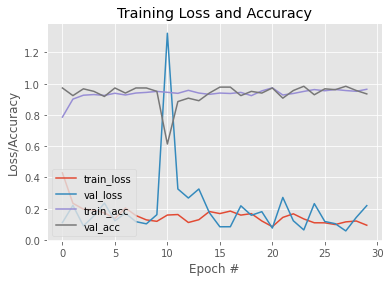

In [27]:
# plot the training loss and accuracy

N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig( cur_dir + r'plot_v2.png')
